# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent =4, sort_keys =True))

{
    "data": {
        "1": {
            "circulating_supply": 19348250,
            "id": 1,
            "last_updated": 1681696486,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 579874178080,
                    "percent_change_1h": 0.374448359790761,
                    "percent_change_24h": -1.03798395281692,
                    "percent_change_7d": 5.66477303675368,
                    "percentage_change_1h": 0.374448359790761,
                    "percentage_change_24h": -1.03798395281692,
                    "percentage_change_7d": 5.66477303675368,
                    "price": 29957.0,
                    "volume_24h": 12750883960
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19348250,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent =4, sort_keys =True))

{
    "data": {
        "1027": {
            "circulating_supply": 119716878,
            "id": 1027,
            "last_updated": 1681696486,
            "max_supply": 119434715,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 250680281702,
                    "percent_change_1h": 0.480116809455997,
                    "percent_change_24h": 0.0585516363451501,
                    "percent_change_7d": 12.5018964382842,
                    "percentage_change_1h": 0.480116809455997,
                    "percentage_change_24h": 0.0585516363451501,
                    "percentage_change_7d": 12.5018964382842,
                    "price": 2092.47,
                    "volume_24h": 9589187273
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119716878,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cry

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']
                

# Print the current price of BTC
print(f"The price for BTC is ${btc_price:,.2f}")


The price for BTC is $29,957.00


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
# Print the current price of ETH
print(f"The price for ETH is ${eth_price:,.2f}")


The price for ETH is $2,092.47


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The value of BTC holdings is ${btc_value:,.2f}")


The value of BTC holdings is $35,948.40


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The value of BTC holdings is ${eth_value:,.2f}")


The value of BTC holdings is $11,090.09


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The value of the wallet is ${total_crypto_wallet:,.2f}")


The value of the wallet is $47038.491


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
#Load in all API keys 
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secrect_key = os.getenv("ALPACA_SECRECT_KEY")
nasdaq_api_key = os.getenv("NASDAQ_API_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secrect_key,
    api_version="v2")

#Test that API are loaded correctly
print(f"{type(alpaca_api_key)}")
print(f"{type(alpaca_secrect_key)}")
print(f"{type(nasdaq_api_key)}")

<class 'str'>
<class 'str'>
<class 'str'>


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers= ["SPY","AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2023-04-13",tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-13",tz= "America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_bars(tickers,timeframe,start = start_date, end = end_date).df
#df_portfolio

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis =1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis =1)    

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY,AGG], axis =1, keys=["SPY","AGG"])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()
                      


SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2020-04-13 04:00:00+00:00  277.14  277.5100  271.4100  275.63  114868253   
2020-04-14 04:00:00+00:00  280.98  284.9000  275.5106  283.80  134143470   
2020-04-15 04:00:00+00:00  277.57  283.9407  275.4600  277.75  121779042   
2020-04-16 04:00:00+00:00  279.15  280.0300  275.7600  278.96  132398585   
2020-04-17 04:00:00+00:00  285.38  287.3000  282.4000  286.54  146685294   
2023-04-06 04:00:00+00:00  406.77  409.4800  405.6780  409.19   63743345   
2023-04-10 04:00:00+00:00  406.61  409.6900  405.9700  409.61   63693219   
2023-04-11 04:00:00+00:00  410.26  411.1800  408.9200  409.72   59316777   
2023-04-12 04:00:00+00:00  411.87  412.1700  407.4400  408.05   86440377   
2023-04-13 04:00:00+00:00  409.18  413.8400  407.9922  413.47   85814754   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-04-13 04:00:00+00:00      752225  274.512847  117.09  117.1700  116.5308   
2020-04-14 04:00:00+00:00      761246  282.089774  116.99  117.0000  116.5850   
2020-04-15 04:00:00+00:00      711140  277.826041  117.03  117.3050  116.7100   
2020-04-16 04:00:00+00:00      748801  278.840675  117.19  117.5250  117.1900   
2020-04-17 04:00:00+00:00      699788  284.307868  117.52  117.6200  117.0350   
2023-04-06 04:00:00+00:00      482110  408.101856  100.56  100.6850  100.4400   
2023-04-10 04:00:00+00:00      468483  408.081412   99.89   99.9100   99.6000   
2023-04-11 04:00:00+00:00      403316  410.018650   99.81   99.8800   99.5900   
2023-04-12 04:00:00+00:00      639926  409.706051  100.17  100.2000   99.6100   
2023-04-13 04:00:00+00:00      566796  411.717306  100.16  100.2677   99.8050   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-04-13 04:00:00+00:00  116.70  5738262       24812  116.845817  
2020-04-14 04:00:00+00:00  116.76  5506671       23102  116.766750  
2020-04-15 04:00:00+00:00  117.24  4367410       19620  117.144915  
2020-04-16 04:00:00+00:00  117.39  4744716       16906  117.399687  
2020-04-17 04:00:00+00:00  117.25  4949824       25621  117.358347  
2023-04-06 04:00:00+00:00  100.44  6105185       23351  100.515057  
2023-04-10 04:00:00+00:00   99.75  4477958       21431   99.752952  
2023-04-11 04:00:00+00:00   99.81  4543803       19479   99.740336  
2023-04-12 04:00:00+00:00   99.93  7226122       33545   99.885733  
2023-04-13 04:00:00+00:00   99.89  3964799       18405   99.967812

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
#prices_df.index = prices_df.index.date
agg_close_price = float(prices_df['AGG']['close'])
#gg_close_price_clean = float(agg_close_price)

# Print the AGG closing price
agg_close_price

99.89

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df['SPY']['close'])

# Print the SPY closing price
spy_close_price


413.47

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"Current value of the bond portfolio ${agg_value:,.2f}")

Current value of the bond portfolio $19,978.00


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price
# Print the current value of the stock portfolio
print(f"Current value of the stock portfolio ${spy_value:,.2f}")

Current value of the stock portfolio $45,481.70


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Current balance of the stock & bond portfolio ${total_stocks_bonds:,.2f}")

Current balance of the stock & bond portfolio $65,459.70


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f"Current balance of the stock & bond portfolio ${total_portfolio:,.2f}")


Current balance of the stock & bond portfolio $112,498.19


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list

savings_data = (total_crypto_wallet,total_stocks_bonds)

# Review the Python list savings_data
print(savings_data)    

(47038.491, 65459.700000000004)


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 

savings_df=pd.DataFrame(savings_data, columns = ['amount'], index = ['crypto','stocks/bonds'])

# Display the savings_df DataFrame
savings_df.head()


,amount
crypto,47038.491
stocks/bonds,65459.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Members Portfolio'}, ylabel='amount'>

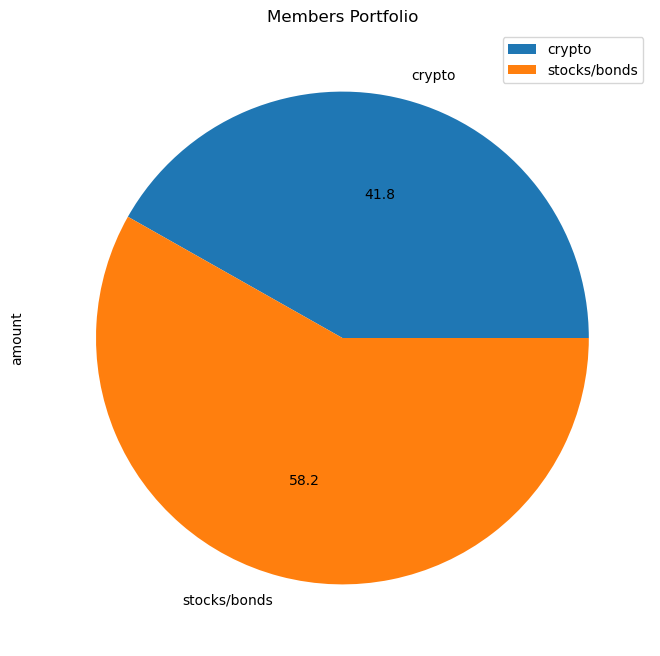

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# May consdier using a Lamda function to calculate and display percentages?
savings_df.plot.pie(y = 'amount', figsize=(8,8), title = ('Members Portfolio'), autopct = '%.1f')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income *3
# Test variables for if statement
#emergency_fund_value = total_portfolio
#emergency_fund_value = monthly_income *10
print(f"${emergency_fund_value:,.2f}")


$36,000.00


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f'Congratulations! You have enough money in the fund')
elif total_portfolio == emergency_fund_value: 
    print(f'Total portfolio value is equal to emergency fund goal')
elif total_portfolio < emergency_fund_value:
    emergency_fund_gap = total_portfolio - emergency_fund_value
    print(f'You are ${emergency_fund_gap:,.2f} away from your goal')
                


Congratulations! You have enough money in the fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [37]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2020-04-13",tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-13",tz="America/New_York").isoformat()

In [44]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
df_portfolio = alpaca.get_bars(tickers,timeframe,start = start_date, end = end_date).df

# Show data table to make sure response is correct commented out
#df_portfolio

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis =1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis =1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY,AGG], axis =1, keys=["SPY","AGG"])

# Display both the first and last five rows of the DataFrame
pd.concat([prices_df.head(), prices_df.tail()])


SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2020-04-13 04:00:00+00:00  277.14  277.5100  271.4100  275.63  114868253   
2020-04-14 04:00:00+00:00  280.98  284.9000  275.5106  283.80  134143470   
2020-04-15 04:00:00+00:00  277.57  283.9407  275.4600  277.75  121779042   
2020-04-16 04:00:00+00:00  279.15  280.0300  275.7600  278.96  132398585   
2020-04-17 04:00:00+00:00  285.38  287.3000  282.4000  286.54  146685294   
2023-04-06 04:00:00+00:00  406.77  409.4800  405.6780  409.19   63743345   
2023-04-10 04:00:00+00:00  406.61  409.6900  405.9700  409.61   63693219   
2023-04-11 04:00:00+00:00  410.26  411.1800  408.9200  409.72   59316777   
2023-04-12 04:00:00+00:00  411.87  412.1700  407.4400  408.05   86440377   
2023-04-13 04:00:00+00:00  409.18  413.8400  407.9922  413.47   85814754   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-04-13 04:00:00+00:00      752225  274.512847  117.09  117.1700  116.5308   
2020-04-14 04:00:00+00:00      761246  282.089774  116.99  117.0000  116.5850   
2020-04-15 04:00:00+00:00      711140  277.826041  117.03  117.3050  116.7100   
2020-04-16 04:00:00+00:00      748801  278.840675  117.19  117.5250  117.1900   
2020-04-17 04:00:00+00:00      699788  284.307868  117.52  117.6200  117.0350   
2023-04-06 04:00:00+00:00      482110  408.101856  100.56  100.6850  100.4400   
2023-04-10 04:00:00+00:00      468483  408.081412   99.89   99.9100   99.6000   
2023-04-11 04:00:00+00:00      403316  410.018650   99.81   99.8800   99.5900   
2023-04-12 04:00:00+00:00      639926  409.706051  100.17  100.2000   99.6100   
2023-04-13 04:00:00+00:00      566796  411.717306  100.16  100.2677   99.8050   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-04-13 04:00:00+00:00  116.70  5738262       24812  116.845817  
2020-04-14 04:00:00+00:00  116.76  5506671       23102  116.766750  
2020-04-15 04:00:00+00:00  117.24  4367410       19620  117.144915  
2020-04-16 04:00:00+00:00  117.39  4744716       16906  117.399687  
2020-04-17 04:00:00+00:00  117.25  4949824       25621  117.358347  
2023-04-06 04:00:00+00:00  100.44  6105185       23351  100.515057  
2023-04-10 04:00:00+00:00   99.75  4477958       21431   99.752952  
2023-04-11 04:00:00+00:00   99.81  4543803       19479   99.740336  
2023-04-12 04:00:00+00:00   99.93  7226122       33545   99.885733  
2023-04-13 04:00:00+00:00   99.89  3964799       18405   99.967812

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [49]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_threeyear = MCSimulation(
    portfolio_data = prices_df,
    weights =[0.60,0.40],
    num_simulation = 500,
    num_trading_days =252*3
)

# Review the simulation input data
pd.concat([MC_threeyear.portfolio_data.head(),
           MC_threeyear.portfolio_data.tail()])

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2020-04-13 04:00:00+00:00  277.14  277.5100  271.4100  275.63  114868253   
2020-04-14 04:00:00+00:00  280.98  284.9000  275.5106  283.80  134143470   
2020-04-15 04:00:00+00:00  277.57  283.9407  275.4600  277.75  121779042   
2020-04-16 04:00:00+00:00  279.15  280.0300  275.7600  278.96  132398585   
2020-04-17 04:00:00+00:00  285.38  287.3000  282.4000  286.54  146685294   
2023-04-06 04:00:00+00:00  406.77  409.4800  405.6780  409.19   63743345   
2023-04-10 04:00:00+00:00  406.61  409.6900  405.9700  409.61   63693219   
2023-04-11 04:00:00+00:00  410.26  411.1800  408.9200  409.72   59316777   
2023-04-12 04:00:00+00:00  411.87  412.1700  407.4400  408.05   86440377   
2023-04-13 04:00:00+00:00  409.18  413.8400  407.9922  413.47   85814754   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-04-13 04:00:00+00:00      752225  274.512847          NaN  117.09   
2020-04-14 04:00:00+00:00      761246  282.089774     0.029641  116.99   
2020-04-15 04:00:00+00:00      711140  277.826041    -0.021318  117.03   
2020-04-16 04:00:00+00:00      748801  278.840675     0.004356  117.19   
2020-04-17 04:00:00+00:00      699788  284.307868     0.027172  117.52   
2023-04-06 04:00:00+00:00      482110  408.101856     0.003901  100.56   
2023-04-10 04:00:00+00:00      468483  408.081412     0.001026   99.89   
2023-04-11 04:00:00+00:00      403316  410.018650     0.000269   99.81   
2023-04-12 04:00:00+00:00      639926  409.706051    -0.004076  100.17   
2023-04-13 04:00:00+00:00      566796  411.717306     0.013283  100.16   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2020-04-13 04:00:00+00:00  117.1700  116.5308  116.70  5738262       24812   
2020-04-14 04:00:00+00:00  117.0000  116.5850  116.76  5506671       23102   
2020-04-15 04:00:00+00:00  117.3050  116.7100  117.24  4367410       19620   
2020-04-16 04:00:00+00:00  117.5250  117.1900  117.39  4744716       16906   
2020-04-17 04:00:00+00:00  117.6200  117.0350  117.25  4949824       25621   
2023-04-06 04:00:00+00:00  100.6850  100.4400  100.44  6105185       23351   
2023-04-10 04:00:00+00:00   99.9100   99.6000   99.75  4477958       21431   
2023-04-11 04:00:00+00:00   99.8800   99.5900   99.81  4543803       19479   
2023-04-12 04:00:00+00:00  100.2000   99.6100   99.93  7226122       33545   
2023-04-13 04:00:00+00:00  100.2677   99.8050   99.89  3964799       18405   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-04-13 04:00:00+00:00  116.845817          NaN  
2020-04-14 04:00:00+00:00  116.766750     0.000514  
2020-04-15 04:00:00+00:00  117.144915     0.004111  
2020-04-16 04:00:00+00:00  117.399687     0.001279  
2020-04-17 04:00:00+00:00  117.358347    -0.001193  
2023-04-06 04:00:00+00:00  100.515057    -0.000895  
2023-04-10 04:00:00+00:00   99.752952    -0.006870  
2023-04-11 04:00:00+00:00   99.740336     0.000602  
2023-04-12 04:00:00+00:00   99.885733     0.001202  
2023-04-13 04:00:00+00:00   99.967812    -0.000400

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE


In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = # YOUR CODE HERE
ci_upper_thirty_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


SyntaxError: invalid syntax (2789942235.py, line 2)

### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?